In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import seaborn as sns

In [11]:
data = pd.read_csv("Cleaned_Data2016-17.csv")

In [12]:
df_concat = data[['Unnamed: 0', 'Commodity', 'State', 'Market Center', 'Report Date', 'Modal Prices(in Rs/quintals)', 'Arrival_Tonnes_Calc']]
len(df_concat)

3390595

In [13]:
df_concat.dropna(inplace = True)
len(df_concat)

/Users/PV/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


3002888

In [14]:
df_concat.head()

,Unnamed: 0,Commodity,State,Market Center,Report Date,Modal Prices(in Rs/quintals),Arrival_Tonnes_Calc
1,1,Coffee,Kerala,Kalpetta,20160402,5700.0,10.0
2,2,Coffee,Kerala,Kalpetta,20160404,5700.0,10.0
3,3,Coffee,Kerala,Kalpetta,20160406,5700.0,7.5
4,4,Coffee,Kerala,Kalpetta,20160407,5700.0,8.0
5,5,Coffee,Kerala,Kalpetta,20160408,5700.0,7.5


In [15]:
df = df_concat.groupby(["Commodity", "State", "Market Center"], as_index = False)
df = df.apply(lambda _df: _df.sort_values('Report Date', ascending = True))

#filtering onion data
df1 = df[(df["Commodity"]== 'Onion') ]


In [16]:
df2 = df1[df1["Market Center"] == "Mahuva(Station Road)"]

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 365 entries, (20114, 2733532) to (20114, 2733897)
Data columns (total 7 columns):
Unnamed: 0                      365 non-null int64
Commodity                       365 non-null object
State                           365 non-null object
Market Center                   365 non-null object
Report Date                     365 non-null int64
Modal Prices(in Rs/quintals)    365 non-null float64
Arrival_Tonnes_Calc             365 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 23.2+ MB


In [24]:
df2.head(7)

Unnamed: 0 Commodity    State         Market Center  \
20114 2733532     2733532     Onion  Gujarat  Mahuva(Station Road)   
      2733533     2733533     Onion  Gujarat  Mahuva(Station Road)   
      2733534     2733534     Onion  Gujarat  Mahuva(Station Road)   
      2733535     2733535     Onion  Gujarat  Mahuva(Station Road)   
      2733536     2733536     Onion  Gujarat  Mahuva(Station Road)   
      2733537     2733537     Onion  Gujarat  Mahuva(Station Road)   
      2733538     2733538     Onion  Gujarat  Mahuva(Station Road)   

               Report Date  Modal Prices(in Rs/quintals)  Arrival_Tonnes_Calc  
20114 2733532     20160401                         600.0              13035.7  
      2733533     20160401                         600.0              13035.7  
      2733534     20160402                         600.0               5978.6  
      2733535     20160402                         750.0               5978.6  
      2733536     20160405                         600.0               8570.7  
      2733537     20160405                         750.0               8570.7  
      2733538     20160406                         515.0               9668.5

In [54]:
aggregate = {'Arrival_Tonnes_Calc' :
                    {'sum': np.sum, 'count': 'count'}} 
new1 = df1.groupby(["Commodity", "State", "Market Center"])['Arrival_Tonnes_Calc'].agg(aggregate)

/Users/PV/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/PV/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:3198: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  results[name] = obj.aggregate(func)


In [55]:
new1 = new1.reset_index()
new1.columns = new1.columns.droplevel()
new1.columns = ['Commodity', 'State', 'Market Center', 'Qtity', 'count']

In [56]:
new1.head(3) 

,Commodity,State,Market Center,Qtity,count
0,Onion,Andaman and Nicobar,Diglipur,11.26,20
1,Onion,Andhra Pradesh,Eluru,4.50,1
2,Onion,Andhra Pradesh,"Eluru(P.Sri.Mkt),RBZ",163.00,38


In [57]:
len(new1['Market Center'].unique())

917

In [66]:
new1['market-state'] = new1['Market Center'] + "- " + new1['State']

In [67]:
#selecting top 25 largest quantity mandis of onion 
result = new1.nlargest(25, ['Qtity']) 

In [68]:
result.head()

,Commodity,State,Market Center,Qtity,count,market-state
180,Onion,Karnataka,Bangalore,3632146.0,1054,Bangalore- Karnataka
49,Onion,Gujarat,Mahuva(Station Road),986906.3,365,Mahuva(Station Road)- Gujarat
640,Onion,Telangana,Hyderabad (F&V),491479.1,537,Hyderabad (F&V)- Telangana
38,Onion,Gujarat,Bhavnagar,407057.9,285,Bhavnagar- Gujarat
390,Onion,Maharashtra,Pimpalgaon,393943.0,302,Pimpalgaon- Maharashtra


In [76]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [97]:
iplot([go.Scatter(x=result['market-state'], y= result['Qtity'], mode='markers')])

In [78]:
iplot([go.Scatter(x=new1['market-state'], y=new1['Qtity'], mode='markers')])

In [79]:
import matplotlib.pyplot as plt

In [80]:
df2['date'] = pd.to_datetime(df2['Report Date'].astype('str'), format = '%Y%m%d')

/Users/PV/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



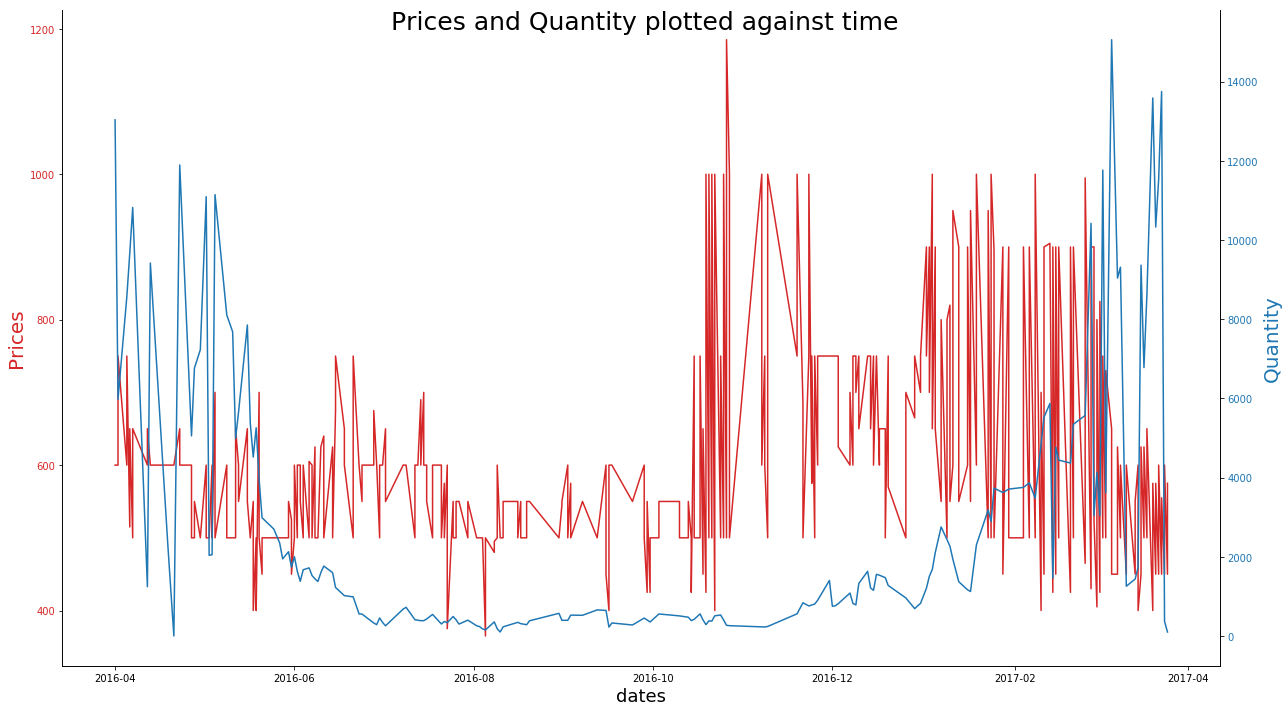

In [95]:
fig, ax1 = plt.subplots(figsize=(18, 10))
fig.suptitle('Prices and Quantity plotted against time', fontsize= 25)

color = 'tab:red'
ax1.set_xlabel('dates', fontsize = 18)
ax1.set_ylabel('Prices', color=color, fontsize = 20)
ax1.plot(df2['date'],df2['Modal Prices(in Rs/quintals)'], color= color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.spines['top'].set_visible(False)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Quantity', color=color, fontsize = 20)  
ax2.plot(df2['date'],df2['Arrival_Tonnes_Calc'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.spines['top'].set_visible(False)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
# fig.settitle()
plt.show()